# 필요한 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

%matplotlib inline

# matplotlib 한글 깨짐 해결
plt.rcParams['font.family'] = 'AppleGothic' # For MacOS
plt.rcParams['axes.unicode_minus'] =False

# Seaborn 폰트 설정
sns.set(font='AppleGothic') # 사용하고 있는 한글 폰트로 변경

print(plt.rcParams['font.family'])

['AppleGothic']


# 데이터 불러오기

In [2]:
users_df = pd.read_csv('train_users_2.csv')
users_df.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [3]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

In [4]:
users_df.count()

id                         213451
date_account_created       213451
timestamp_first_active     213451
date_first_booking          88908
gender                     213451
age                        125461
signup_method              213451
signup_flow                213451
language                   213451
affiliate_channel          213451
affiliate_provider         213451
first_affiliate_tracked    207386
signup_app                 213451
first_device_type          213451
first_browser              213451
country_destination        213451
dtype: int64

In [5]:
users_df.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [6]:
sessions_df = pd.read_csv('sessions.csv')
sessions_df.head(10)

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
5,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,7703.0
6,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,115.0
7,d1mm9tcy42,personalize,data,wishlist_content_update,Windows Desktop,831.0
8,d1mm9tcy42,index,view,view_search_results,Windows Desktop,20842.0
9,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,683.0


In [7]:
sessions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        object 
 1   action         object 
 2   action_type    object 
 3   action_detail  object 
 4   device_type    object 
 5   secs_elapsed   float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB


In [8]:
sessions_df.count()

user_id          10533241
action           10488111
action_type       9441533
action_detail     9441533
device_type      10567737
secs_elapsed     10431706
dtype: int64

In [9]:
sessions_df.isnull().sum()

user_id            34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64

# users_df 전처리
- 18~122세 이외의 age -> null처리
- 범주형인데 object 타입 -> category 타입으로 변환
- date_account_created, date_first_booking : datetime 타입으로 변환 (%Y-%m-%d 형식)
- timestamp_first_active : datetime 타입으로 변환 (%Y-%m-%d %H:%M:%S 형식)

In [10]:
# age 컬럼에서 18세 이상 122세 이하의 값을 제외한 나머지 값을 null로 처리
users_df.loc[(users_df['age'] < 18) | (users_df['age'] > 122), 'age'] = np.nan

users_df.age.isnull().sum()

88929

In [11]:
# 변환할 컬럼 지정
columns_to_convert = [
    'gender', 'signup_method', 'language', 'affiliate_channel', 
    'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 
    'first_device_type', 'first_browser', 'country_destination'
]

for column in columns_to_convert:
    users_df[column] = users_df[column].astype('category')

print(users_df.dtypes)

id                           object
date_account_created         object
timestamp_first_active        int64
date_first_booking           object
gender                     category
age                         float64
signup_method              category
signup_flow                   int64
language                   category
affiliate_channel          category
affiliate_provider         category
first_affiliate_tracked    category
signup_app                 category
first_device_type          category
first_browser              category
country_destination        category
dtype: object


In [12]:
# date_account_created 및 date_first_booking 컬럼을 datetime 타입으로 변환
users_df['date_account_created'] = pd.to_datetime(users_df['date_account_created'])
users_df['date_first_booking'] = pd.to_datetime(users_df['date_first_booking'])

# timestamp_first_active는 타임스탬프 형식으로 되어있으므로 변환
users_df['timestamp_first_active'] = pd.to_datetime(users_df['timestamp_first_active'], format='%Y%m%d%H%M%S')

In [13]:
users_df.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,2010-01-01 21:56:19,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,2010-01-02 01:25:58,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,2010-01-03 19:19:05,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,2010-01-04 00:42:11,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,2010-01-04 02:37:58,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [14]:
# 확인
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       213451 non-null  object        
 1   date_account_created     213451 non-null  datetime64[ns]
 2   timestamp_first_active   213451 non-null  datetime64[ns]
 3   date_first_booking       88908 non-null   datetime64[ns]
 4   gender                   213451 non-null  category      
 5   age                      124522 non-null  float64       
 6   signup_method            213451 non-null  category      
 7   signup_flow              213451 non-null  int64         
 8   language                 213451 non-null  category      
 9   affiliate_channel        213451 non-null  category      
 10  affiliate_provider       213451 non-null  category      
 11  first_affiliate_tracked  207386 non-null  category      
 12  signup_app      

# 세션 타임스탬프 만들기

## (1) secs_elapsed 이상치, NaN값 처리
- action 별 이상치 : 해당하는 행 제거 
- NaN값 : action 별 평균값으로 대체

※ 이상치는 boxplot 기준으로 (Q1 – 1.5 * IQR) 보다 작거나 (Q3 + 1.5 * IQR) 보다 큰 데이터를 이상치로 판단했다.

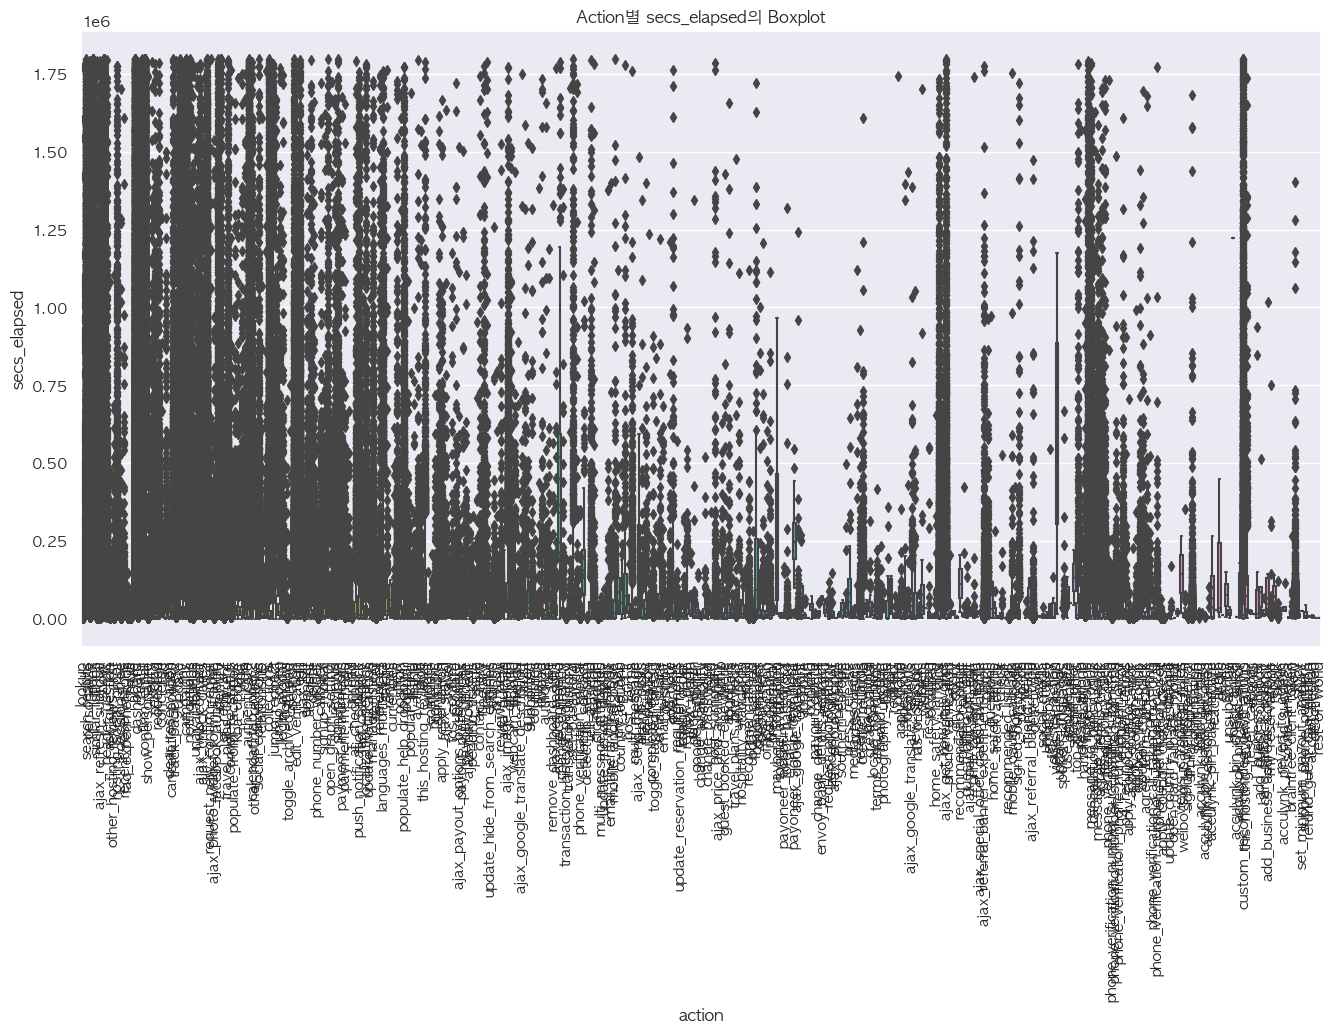

In [15]:
# 박스 플롯으로 데이터 파악
plt.figure(figsize=(16, 8))
sns.boxplot(x='action', y='secs_elapsed', data=sessions_df)
plt.xticks(rotation=90)
plt.title('Action별 secs_elapsed의 Boxplot')
plt.show()

In [16]:
# IQR을 이용한 이상치 제거
Q1 = sessions_df.groupby('action')['secs_elapsed'].transform(lambda x: x.quantile(0.25))
Q3 = sessions_df.groupby('action')['secs_elapsed'].transform(lambda x: x.quantile(0.75))
IQR = Q3 - Q1
outlier_condition = ~(
    (sessions_df['secs_elapsed'] < (Q1 - 1.5 * IQR)) | 
    (sessions_df['secs_elapsed'] > (Q3 + 1.5 * IQR))
)
sessions_df = sessions_df[outlier_condition]

# 개수 확인
sessions_df.count()

user_id          9141598
action           9092126
action_type      8140368
action_detail    8140368
device_type      9171752
secs_elapsed     9035721
dtype: int64

In [17]:
# NaN 값 처리
def fillna_with_mean(group):
    mean_value = group['secs_elapsed'].mean()
    group['secs_elapsed'].fillna(mean_value, inplace=True)
    return group

# DataFrame에 함수 적용
sessions_df = sessions_df.groupby('action').apply(fillna_with_mean)

# 확인
sessions_df.isnull().sum()

user_id            30008
action                 0
action_type      1031384
action_detail    1031384
device_type            0
secs_elapsed           0
dtype: int64

## (2) 데이터 병합
- users_df의 id 컬럼명을 user_id로 변경한다.
- sessions_df에 users_df의 date_accout_created, date_first_booking, timestamp_fist_active, affiliate_channel (필요하다고 생각한 컬럼만 일단 추출했습니다.)컬럼을 추출하여 user_id 기준으로 LEFT JOIN 했다.

In [18]:
# 데이터 병합
users_df.rename(columns={'id': 'user_id'}, inplace=True) # 컬럼 이름 변경
merged_df = sessions_df.merge(users_df[['user_id', 'date_account_created', 'date_first_booking', 'timestamp_first_active', 'affiliate_channel']], on='user_id', how='left')

merged_df.head(10)

,user_id,action,action_type,action_detail,device_type,secs_elapsed,date_account_created,date_first_booking,timestamp_first_active,affiliate_channel
0,toga865pvz,10,message_post,message_post,iPhone,38113.0,2014-01-01,NaT,2014-01-01 02:32:47,api
1,uyb283j6j0,10,message_post,message_post,iPhone,42635.0,2014-01-01,2014-01-01,2014-01-01 17:33:17,direct
2,d3f3myba0i,10,message_post,message_post,iPhone,16074.0,2014-01-01,2014-01-01,2014-01-01 22:35:37,direct
3,8766khns50,10,message_post,message_post,iPhone,126000.0,2014-01-03,NaT,2014-01-03 07:03:32,direct
4,8766khns50,10,message_post,message_post,iPhone,184000.0,2014-01-03,NaT,2014-01-03 07:03:32,direct
5,8766khns50,10,message_post,message_post,iPhone,186000.0,2014-01-03,NaT,2014-01-03 07:03:32,direct
6,8766khns50,10,message_post,message_post,iPhone,174000.0,2014-01-03,NaT,2014-01-03 07:03:32,direct
7,fmcn5ps23k,10,message_post,message_post,iPhone,133837.0,2014-01-03,2014-01-04,2014-01-03 15:53:57,direct
8,fmcn5ps23k,10,message_post,message_post,iPhone,56758.0,2014-01-03,2014-01-04,2014-01-03 15:53:57,direct
9,rnc5rv3ric,10,message_post,message_post,iPhone,165000.0,2014-01-03,2014-01-04,2014-01-03 18:13:42,direct


In [19]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9092126 entries, 0 to 9092125
Data columns (total 10 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   user_id                 object        
 1   action                  object        
 2   action_type             object        
 3   action_detail           object        
 4   device_type             object        
 5   secs_elapsed            float64       
 6   date_account_created    datetime64[ns]
 7   date_first_booking      datetime64[ns]
 8   timestamp_first_active  datetime64[ns]
 9   affiliate_channel       category      
dtypes: category(1), datetime64[ns](3), float64(1), object(5)
memory usage: 633.0+ MB


## (3) 세션 타임스탬프 계산
각 유저id별로 timestamp_first_active(첫 번째 활동의 타임스탬프)에 secs_elapsed(해당 이벤트부터 다음 이벤트까지 세션 경과시간)을 더해서 session_timestamp 컬럼을 새롭게 생성해 그곳에 정보를 담는다.

In [20]:
# 세션 타임스탬프 계산
merged_df['session_timestamp'] = merged_df['timestamp_first_active'] + pd.to_timedelta(merged_df['secs_elapsed'], unit='s')
merged_df

,user_id,action,action_type,action_detail,device_type,secs_elapsed,date_account_created,date_first_booking,timestamp_first_active,affiliate_channel,session_timestamp
0,toga865pvz,10,message_post,message_post,iPhone,38113.0,2014-01-01,NaT,2014-01-01 02:32:47,api,2014-01-01 13:08:00
1,uyb283j6j0,10,message_post,message_post,iPhone,42635.0,2014-01-01,2014-01-01,2014-01-01 17:33:17,direct,2014-01-02 05:23:52
2,d3f3myba0i,10,message_post,message_post,iPhone,16074.0,2014-01-01,2014-01-01,2014-01-01 22:35:37,direct,2014-01-02 03:03:31
3,8766khns50,10,message_post,message_post,iPhone,126000.0,2014-01-03,NaT,2014-01-03 07:03:32,direct,2014-01-04 18:03:32
4,8766khns50,10,message_post,message_post,iPhone,184000.0,2014-01-03,NaT,2014-01-03 07:03:32,direct,2014-01-05 10:10:12
...,...,...,...,...,...,...,...,...,...,...,...
9092121,osn94hm062,zendesk_login_jwt,-unknown-,-unknown-,Mac Desktop,18959.0,NaT,NaT,NaT,NaN,NaT
9092122,cpszutqnd1,zendesk_login_jwt,-unknown-,-unknown-,Mac Desktop,21890.0,NaT,NaT,NaT,NaN,NaT
9092123,ii1y9pqmsc,zendesk_login_jwt,-unknown-,-unknown-,Mac Desktop,10513.0,NaT,NaT,NaT,NaN,NaT
9092124,ssqamfzu1e,zendesk_login_jwt,-unknown-,-unknown-,Windows Desktop,1222.0,NaT,NaT,NaT,NaN,NaT


In [21]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9092126 entries, 0 to 9092125
Data columns (total 11 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   user_id                 object        
 1   action                  object        
 2   action_type             object        
 3   action_detail           object        
 4   device_type             object        
 5   secs_elapsed            float64       
 6   date_account_created    datetime64[ns]
 7   date_first_booking      datetime64[ns]
 8   timestamp_first_active  datetime64[ns]
 9   affiliate_channel       category      
 10  session_timestamp       datetime64[ns]
dtypes: category(1), datetime64[ns](4), float64(1), object(5)
memory usage: 702.3+ MB


# DAU, MAU, WAU 계산

## 1) DAU (Daily Active Users, 일별 활성 사용자)
에어비엔비 앱 또는 웹을 사용한 사용자수를 일별 집계한 값

In [22]:
# 세션 타임스탬프에서 날짜만 추출
merged_df['session_date'] = merged_df['session_timestamp'].dt.date

dau = merged_df.groupby(['session_date'], as_index=False).agg({'user_id': pd.Series.nunique})
dau = dau.rename(index=str, columns={'session_date': 'date', 'user_id': 'dau'})

# month 컬럼 추가 (월 값만 추출)
dau['month'] = pd.to_datetime(dau['date']).dt.month

dau

,date,dau,month
0,2014-01-01,134,1
1,2014-01-02,378,1
2,2014-01-03,499,1
3,2014-01-04,444,1
4,2014-01-05,452,1
...,...,...,...
187,2014-07-07,3,7
188,2014-07-08,1,7
189,2014-07-11,1,7
190,2014-07-12,1,7


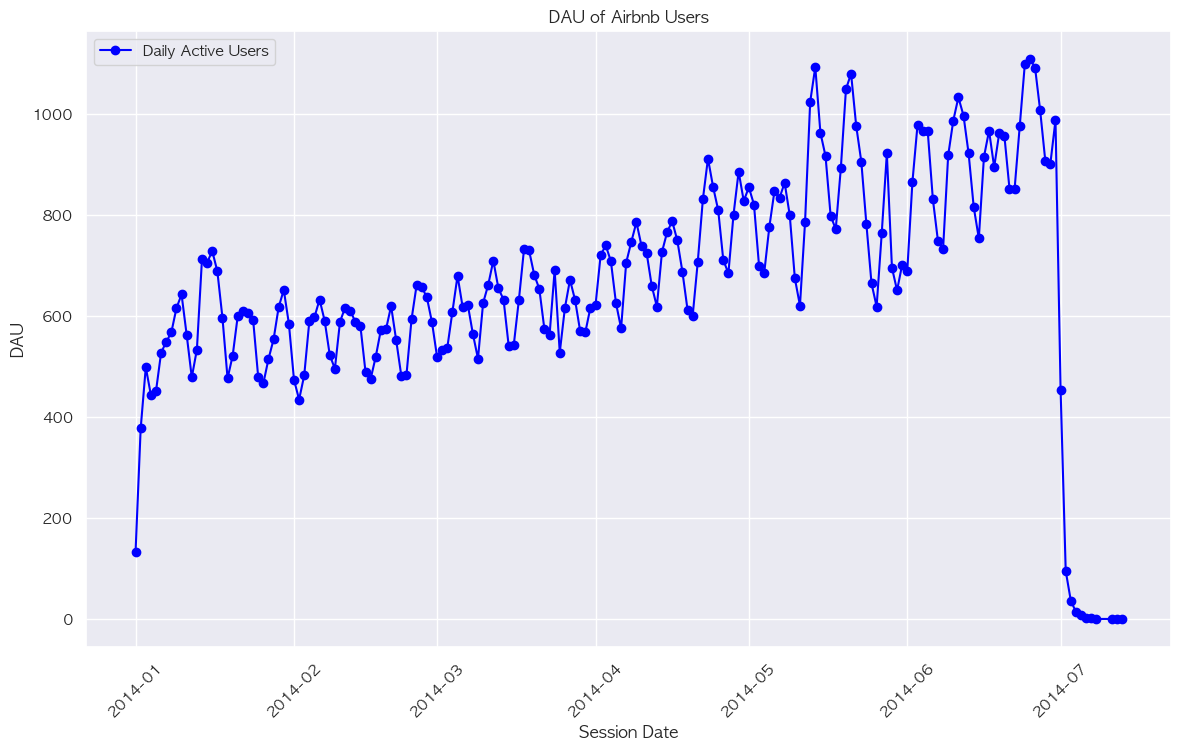

In [23]:
# DAU 시각화
plt.figure(figsize=(14, 8))
plt.plot(dau['date'], dau['dau'], color='blue', marker='o', label='Daily Active Users')
plt.xlabel('Session Date')
plt.ylabel('DAU')
plt.title('DAU of Airbnb Users')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

- 기간에 걸쳐 전반적으로 증가하는 추세이며, 약 일주일 주기로 dau가 높고 낮아지는 변곡점이 생기는 것을 파악했다.
- 특히, 2014-05 ~ 2014-06기간에 일일 활성 사용자가 급격히 높아지는 구간이 발생했으며, 2014-06 마지막주에 일일 활성 사용자 최대치를 기록했다.

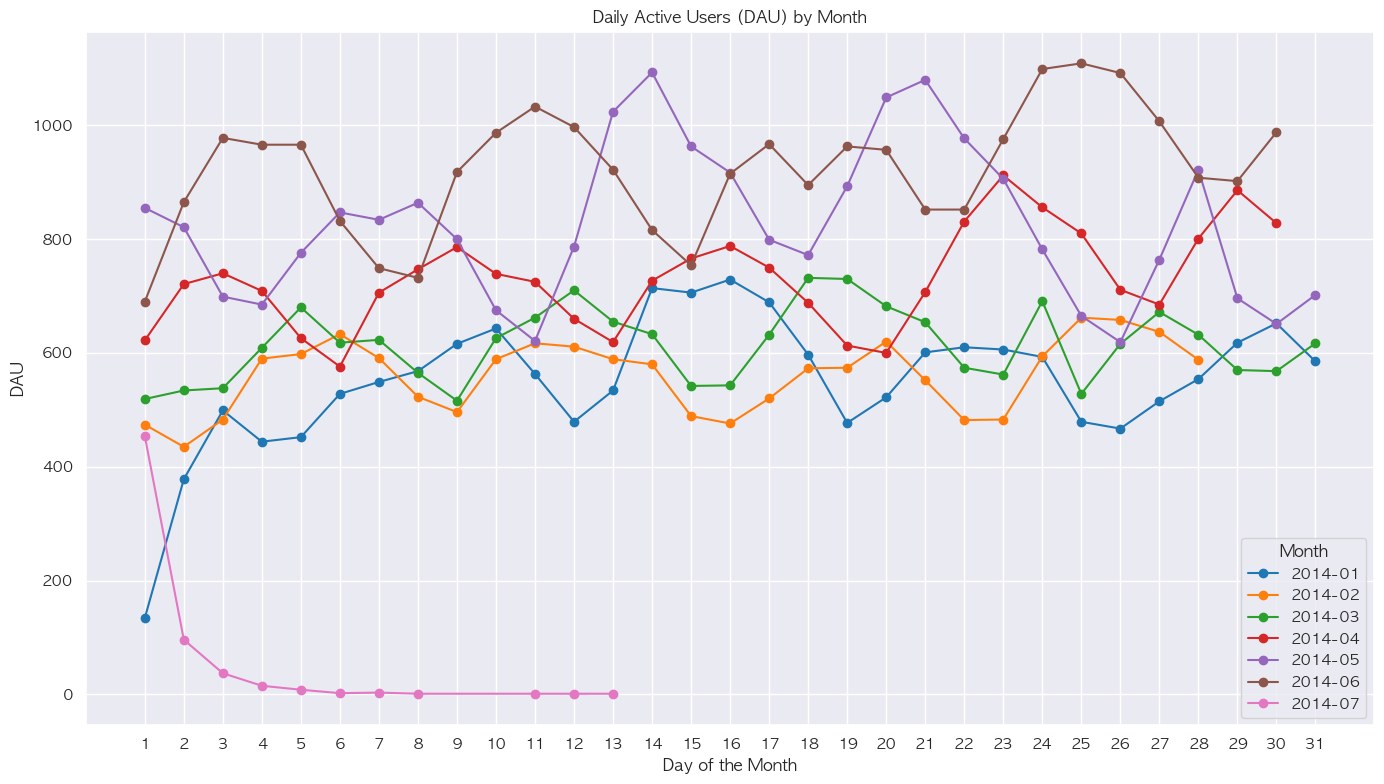

In [25]:
dau['date'] = pd.to_datetime(dau['date'])

# 월별 그룹화
dau['month'] = dau['date'].dt.to_period('M')
dau['day'] = dau['date'].dt.day

palette = sns.color_palette("tab10", n_colors=dau['month'].nunique())
plt.figure(figsize=(14, 8))

# 월별로 데이터를 분리하여 그리기
for month, color in zip(dau['month'].unique(), palette):
    monthly_data = dau[dau['month'] == month]
    plt.plot(monthly_data['day'], monthly_data['dau'], marker='o', linestyle='-', color=color, label=month.strftime('%Y-%m'))

plt.title('Daily Active Users (DAU) by Month')
plt.xlabel('Day of the Month')
plt.ylabel('DAU')
plt.legend(title='Month')
plt.xticks(range(1, 32))
plt.grid(True)
plt.tight_layout()
plt.show()

United States Holiday in 2014 : https://www.timeanddate.com/holidays/us/2014 

- 1월 : 월초(1/1~1/3)에 급격히 증가하는 지점이 있었다. 1/14 ~ 1/16 기간에 6월 중 가장 많은 일일 사용자를 보였다.
- 6월 : 6/25에 조사 기간 중 가장 많은 일일 사용자를 보였다.
- 7월 : 월초에 급격히 감소하는 추세를 보였는데 이는 데이터 수집 기간 자체가 7월 13일까지여서 그런 것 같다.

In [57]:
dau.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 0 to 191
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    192 non-null    object
 1   dau     192 non-null    int64 
 2   month   192 non-null    int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 5.2+ KB


## 2) WAU (Weekly Active Users; 주별 활성 사용자)
에어비엔비 앱 또는 웹을 사용한 사용자수를 주별 집계한 값

In [58]:
# 세션 타임스탬프에서 추출한 날짜를 DatetimeIndex로 변환 (이렇게 하면 시간 연산 쉽게 할 수 있음)
merged_df['session_date'] = pd.to_datetime(merged_df['session_date'])

# 주간 단위로 유니크한 유저 수 집계 (resample : 주 단위로 데이터 그룹화하고 고유한 인원수 계산)
wau = merged_df.set_index('session_date').resample('W').agg({'user_id': pd.Series.nunique}).reset_index()
wau = wau.rename(columns={'session_date': 'date', 'user_id': 'wau'})

wau

,date,wau
0,2014-01-05,1274
1,2014-01-12,2571
2,2014-01-19,2789
3,2014-01-26,2536
4,2014-02-02,2467
5,2014-02-09,2510
6,2014-02-16,2544
7,2014-02-23,2503
8,2014-03-02,2734
9,2014-03-09,2708


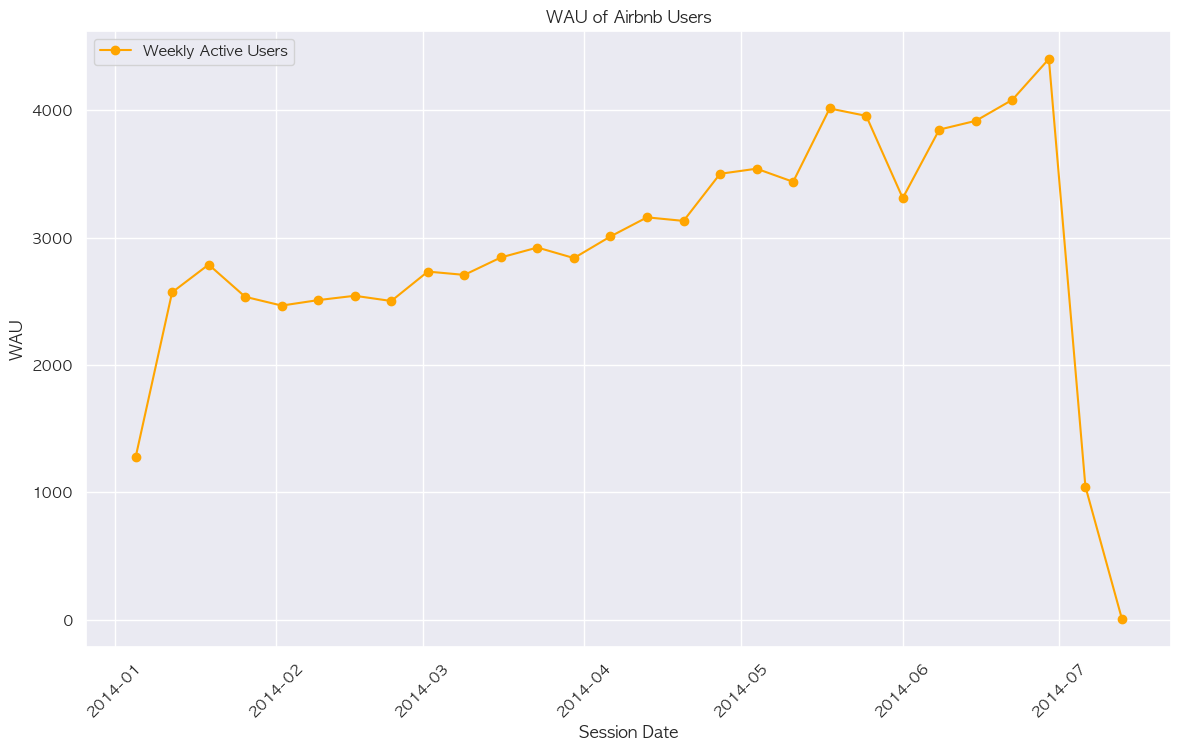

In [59]:
# WAU 시각화
plt.figure(figsize=(14, 8))
plt.plot(wau['date'], wau['wau'], color='orange', marker='o', label='Weekly Active Users')
plt.xlabel('Session Date')
plt.ylabel('WAU')
plt.title('WAU of Airbnb Users')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

- wau는 전반적으로 증가하는 추세를 보인다.
- dau의 결과에 따라, 6월 마지막 주에 가장 많은 주간 활성 사용자를 보였다.

## 3) MAU (Monthly Active Users; 월별 활성 사용자)
에어비엔비 앱 또는 웹을 사용한 사용자수를 월별 집계한 값

In [60]:
# 월간 단위로 유니크한 유저 수 집계
mau = merged_df.set_index('session_date').resample('M').agg({'user_id': pd.Series.nunique}).reset_index()
mau = mau.rename(columns={'session_date': 'date', 'user_id': 'mau'})

# month 컬럼 추가 (월 값만 추출)
mau['month'] = pd.to_datetime(mau['date']).dt.month

mau

,date,mau,month
0,2014-01-31,10191,1
1,2014-02-28,9505,2
2,2014-03-31,11440,3
3,2014-04-30,12870,4
4,2014-05-31,15021,5
5,2014-06-30,15973,6
6,2014-07-31,518,7


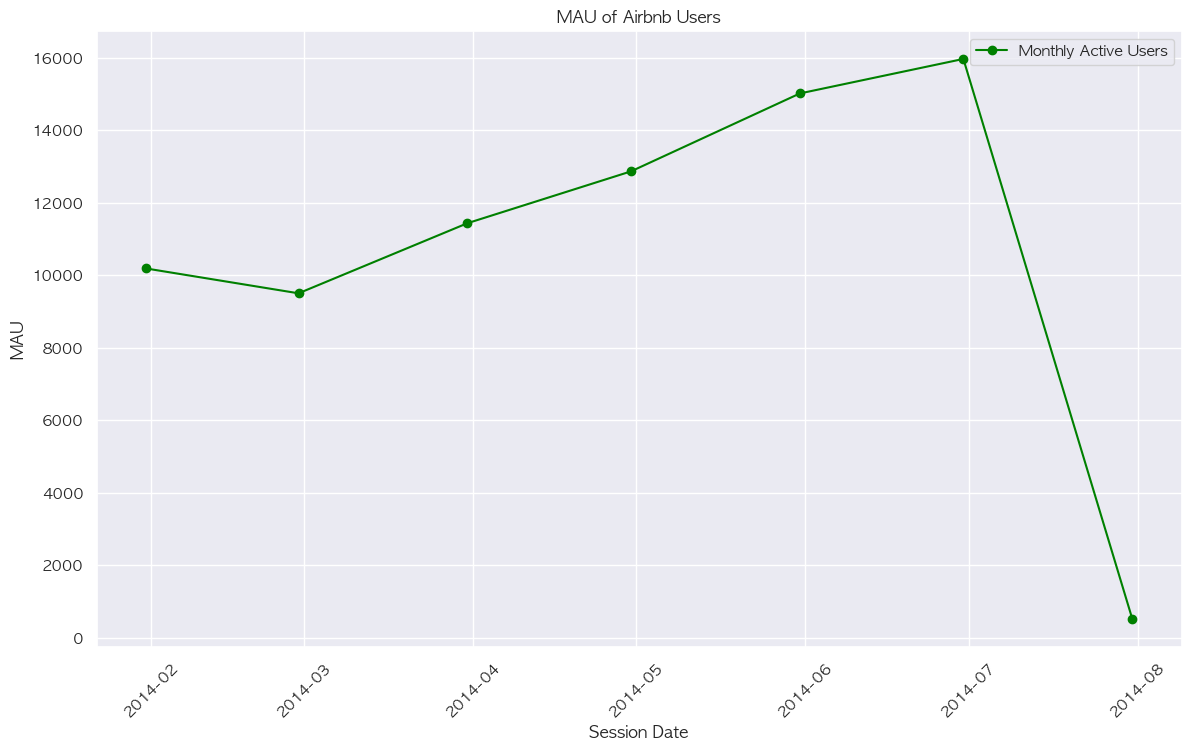

In [61]:
# MAU 시각화
plt.figure(figsize=(14, 8))
plt.plot(mau['date'], mau['mau'], color='green', marker='o', label='Monthly Active Users')
plt.xlabel('Session Date')
plt.ylabel('MAU')
plt.title('MAU of Airbnb Users')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

- 조사 기간동안 전반적으로 증가하는 추세를 보인다.
- 2014-07에 가장 많은 월간 활성 사용자를 가졌으며, 2014-03에 잠깐 감소하는 구간이 있다.

# Stickiness(서비스 고착도)
► Stickiness = DAU/MAU

활성 사용자 지표를 좀 더 의미 있게 보기 위해 절대적 수치가 아닌 월간 활성 사용자와 일간 활성 사용자의 비율을 통해 비교해보았다.

DAU와 MAU 지표를 좀 더 의미있게 보기 위해서는 절대적인 수치로 가치를 측정하는 것이 아니라 월간 활성 사용자(MAU)와 일간 활성 사용자(DAU)를 비교해야 한다. DAU와 MAU를 이용해 월간 unique한 사용자가 얼마나 재접속 했는지에 대한 지표로, 최근 한 달간의 사용자 중 얼마나 많은 사용자가 어제 접속했는지를 확인할 수 있기 때문에 앱/웹 서비스의 재방문율을 파악할 수 있다. 유저가 더 자주 방문할수록 100%에 가까워지고, 수치 자체보다는 수치의 승감에 대해 관찰하는 것이 더 의미 있다.

In [65]:
# DAU와 MAU 데이터 병합
stickiness_df = pd.merge(dau, mau, on='month', how='left', suffixes=('_dau', '_mau'))

# Stickiness 계산
stickiness_df['stickiness'] = (stickiness_df['dau'] / stickiness_df['mau']) * 100

# 결과 출력
stickiness_df = stickiness_df[['date_dau', 'dau', 'mau', 'stickiness']]
stickiness_df

,date_dau,dau,mau,stickiness
0,2014-01-01,134,10191,1.314886
1,2014-01-02,378,10191,3.709155
2,2014-01-03,499,10191,4.896477
3,2014-01-04,444,10191,4.356785
4,2014-01-05,452,10191,4.435286
...,...,...,...,...
187,2014-07-07,3,518,0.579151
188,2014-07-08,1,518,0.193050
189,2014-07-11,1,518,0.193050
190,2014-07-12,1,518,0.193050


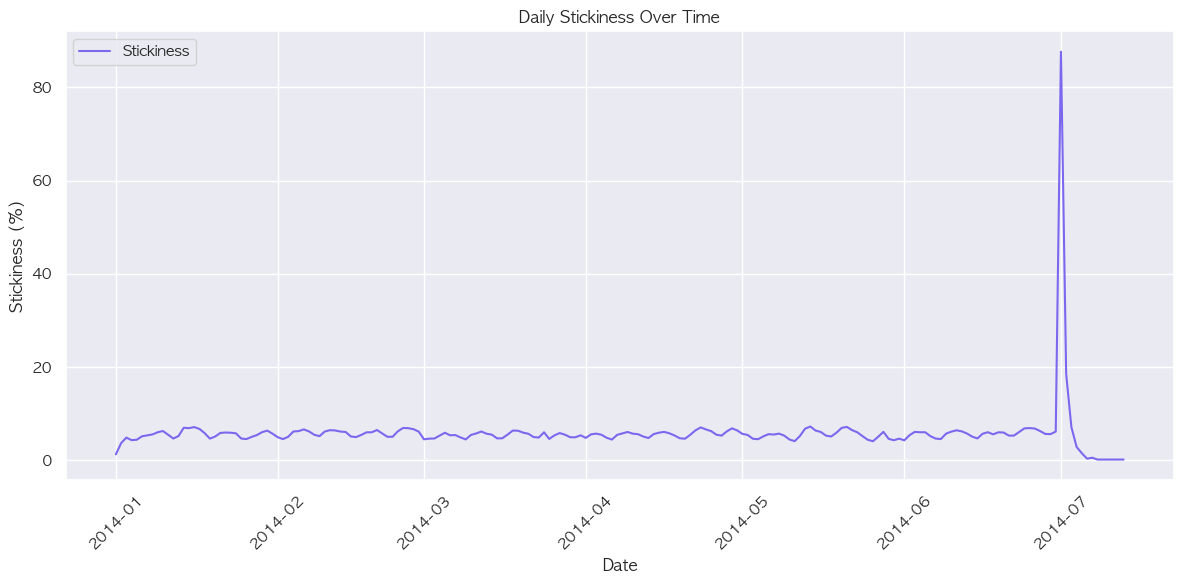

In [68]:
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(stickiness_df['date_dau'], stickiness_df['stickiness'], color='#7B68EE', linestyle='-', label='Stickiness')
plt.title('Daily Stickiness Over Time')
plt.xlabel('Date')
plt.ylabel('Stickiness (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

- 6월까지는 서비스 고착도가 전반적으로 10% 미만을 띄었다. 
- 6월 마지막주 ~ 7월 초에 급격하게 서비스 고착도가 증가했다. (뭔가 이상함.. mau가 급격하게 감소해서 그런 것 같기도 하다.)

# DAU, WAU, MAU 한 차트 내에 시각화

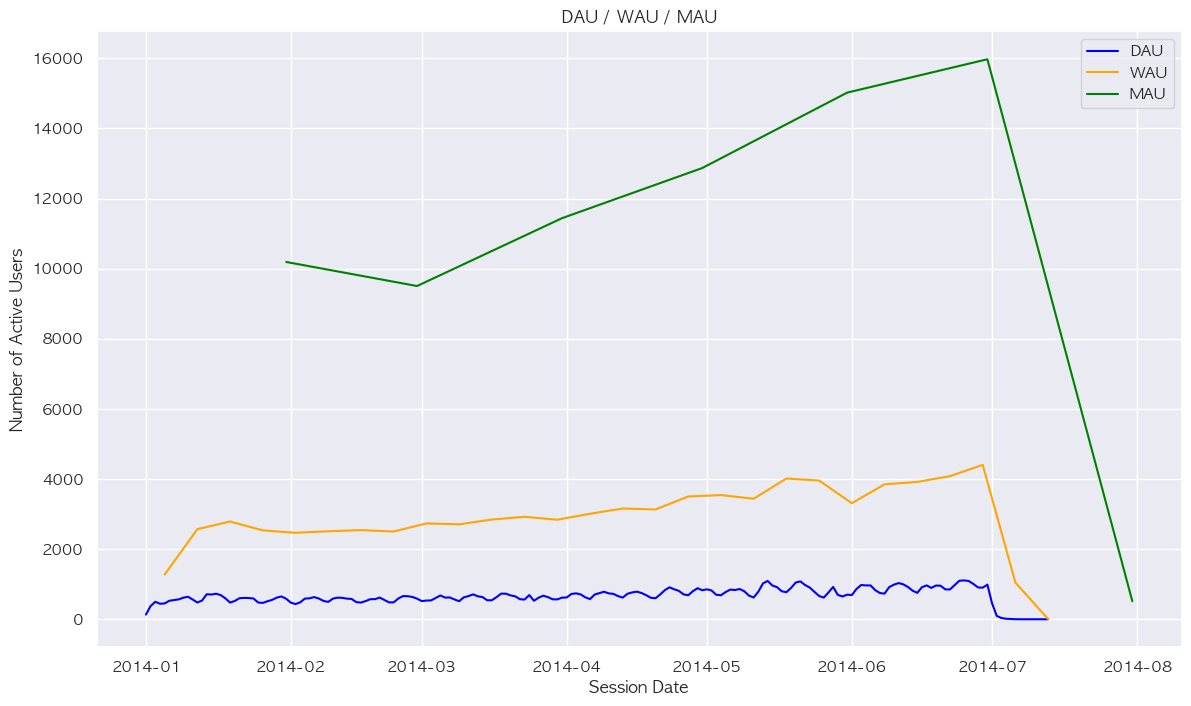

In [69]:
## 한 번에 시각화

# 시각화 위한 데이터 준비
dau.set_index('date', inplace=True)
wau.set_index('date', inplace=True)
mau.set_index('date', inplace=True)


plt.figure(figsize=(14, 8))

plt.plot(dau.index, dau['dau'], label='DAU', color='blue')
plt.plot(wau.index, wau['wau'], label='WAU', color='orange')
plt.plot(mau.index, mau['mau'], label='MAU', color='green')

plt.title('DAU / WAU / MAU')
plt.xlabel('Session Date')
plt.ylabel('Number of Active Users')
plt.legend()
plt.show()

## 요일별/시간대별 사용자수

In [70]:
# 요일별, 시간대별 사용자수 구하기
# 요일별, 시간별로 그룹화 -> 각 그룹 내 고유한 사용자수 집계
week_hour_user = merged_df.groupby([merged_df['session_timestamp'].dt.hour, merged_df['session_timestamp'].dt.weekday])['user_id'].nunique()


# 그룹화된 데이터를 피벗테이블 형태로 변환(행: 시간, 열: 요일)
# unstack은 다중 인덱스를 가진 데이터프레임을 사용할 때 하나의 인덱스를 컬럼으로 변환할 수 있음
week_hour_user = week_hour_user.unstack()

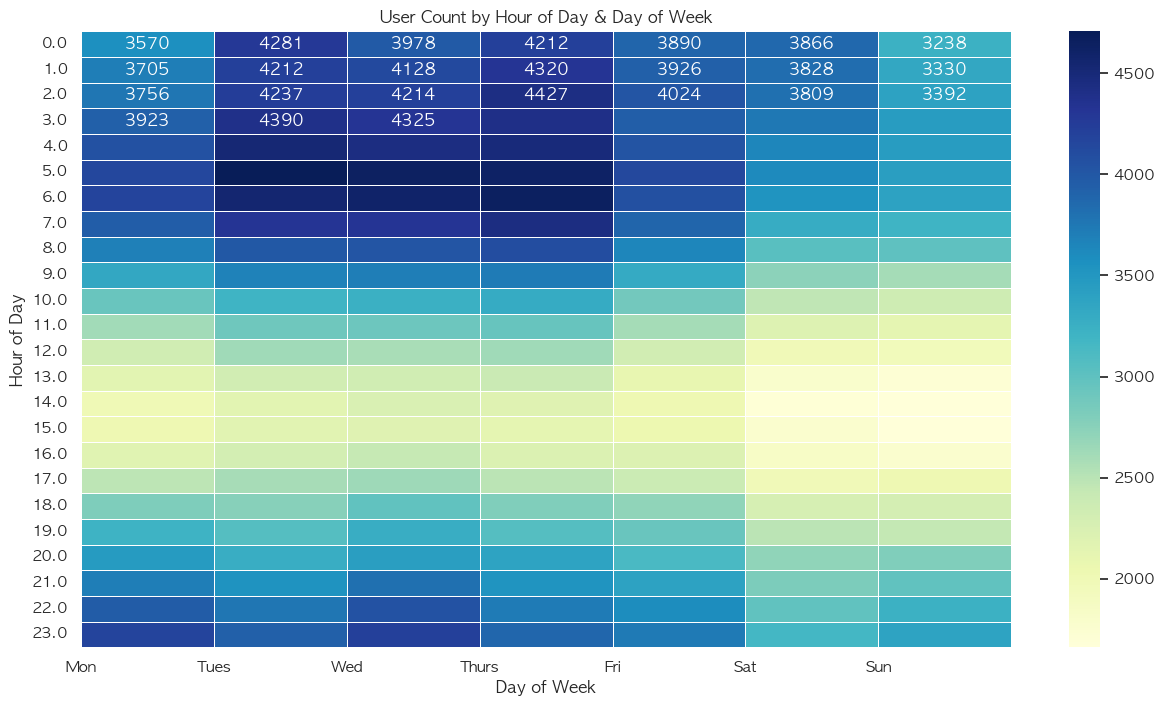

In [71]:
## 히트맵으로 시각화

plt.figure(figsize=(15, 8))
sns.heatmap(data = week_hour_user, cmap='YlGnBu', annot = True, fmt = 'd', linewidths=0.5)
plt.title('User Count by Hour of Day & Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.xticks(ticks=np.arange(7), labels=['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.show()

- 주로 평일 새벽시간과 밤 시간대에 유저 활동이 많다.
- 평일 중에서도 특히 화, 수, 목에 유저 활동이 몰려있는 것 같다.